# **Projek Data Analysis: Capital Bikeshare**




- **Nama:** Muhamad Fauqi Al Azzami
- **Email:** muhamadfauqi.a@upi.edu
- **ID Dicoding:** fauqi123

# **1. Pendahuluan**


# 1.1 Latar Belakang

Sistem berbagi sepeda adalah inovasi dalam persewaan sepeda yang mengotomatiskan seluruh proses, mulai dari pendaftaran anggota, penyewaan, hingga pengembalian sepeda. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia, dengan jumlah sepeda mencapai lebih dari 500 ribu.

Sistem ini menarik perhatian karena perannya yang signifikan dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan. Selain itu, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, sistem berbagi sepeda mencatat secara eksplisit durasi perjalanan, lokasi keberangkatan, dan lokasi kedatangan.

Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk memahami mobilitas di kota. Dengan data yang tersedia, diharapkan bahwa peristiwa penting di kota, seperti pola lalu lintas yang padat atau peristiwa penting lainnya, dapat dideteksi dan dipantau dengan lebih baik.

Secara keseluruhan, sistem berbagi sepeda tidak hanya memberikan manfaat praktis dalam transportasi dan lingkungan, tetapi juga menjadi sumber data yang berharga untuk memahami mobilitas perkotaan dan mendukung pengambilan keputusan yang lebih baik dalam perencanaan kota dan transportasi.

# **2. Rumusan Masalah dalam Bisnis**


1.  bagaimana pengaruh pola-pola jumlah pengguna Bikeshare dapat dipengaruhi musim, cuaca, dan faktor pendukung seperti suhu, kelembaban, dan kecepatan angin?

2.   Apakah korelasi antara bulan dan musim dapat berimplikasi terhadap jumlah pengguna Bikeshare?










# **3. Metode dan Penjelasan Dataset**



## 3.1 Penjelasan Dataset
Proses persewaan sepeda sangat dipengaruhi oleh kondisi lingkungan dan musim. Misalnya, cuaca, curah hujan, hari dalam seminggu, musim, dan jam dalam sehari dapat berpengaruh pada perilaku penyewaan sepeda. Untuk memahami dampak faktor-faktor ini, penelitian menggunakan kumpulan data yang terkait dengan catatan sejarah persewaan sepeda selama dua tahun (2011 dan 2012) dari sistem Capital Bikeshare di Washington D.C., Amerika Serikat. Data ini tersedia untuk umum melalui situs web Capital Bikeshare.

Data dikumpulkan setiap dua jam dan setiap hari, yang memungkinkan peneliti untuk menganalisis tren persewaan sepeda dari waktu ke waktu. Selain itu, informasi cuaca juga diambil dari sumber eksternal seperti http://www.freemeteo.com. Informasi cuaca ini kemudian diintegrasikan ke dalam data persewaan sepeda untuk memahami hubungan antara kondisi cuaca dan pola persewaan sepeda.




## 3.2 Metode Pengerjaan
Dengan memadukan data persewaan sepeda dengan informasi cuaca dan musiman, penelitian dapat mengidentifikasi pola-pola tertentu, seperti peningkatan atau penurunan persewaan sepeda selama hari-hari hujan atau musim tertentu. Analisis ini dapat memberikan wawasan berharga bagi penyedia layanan berbagi sepeda dalam merencanakan strategi pemasaran, pengelolaan stok sepeda, dan penyesuaian layanan mereka dengan kondisi lingkungan dan musim yang berubah-ubah. Adapun metode pengerjaan yang dilakukan adalah menggunakan proses data analisis yang meliputi data wrangling, eksplorasi data, eksplanasi data, visualisasi data, dan hingga interpretasi data.

# **4. Hasil dan Pembahasan**





## 4.1 Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import datetime

## 4.2 Data Wrangling

### 4.2.1 Gathering Data

In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 4.2.1.1 Keterangan Dataset




- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### 4.2.2 Penilaian Data

#### 4.2.2.1 Meninjau Variabel Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### 4.2.2.2 Meninjau Missing Value

In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 4.2.2.3 Meninjau Data Duplikat

In [6]:

hour_df.duplicated().sum()

0

Berdasarkan penilaian dataset Bikeshare yang telah dilakukan, bahwasannya tidak ada data yang terduplikasi dan data yang hilang. namun, beberapa nilai ada yang harus diperbaiki antara lain:

*   data dteday yang berupa kalender perlu diralat tipe datanya yang awalnya object menjadi datetime

*   mengubah data yang dinormalisasi menjadi nilai yang sebenarnya seperti data temp, atemp, hum , dan windspeed


*   mengubah nilai variabel mnth, yr, dan season





### 4.2.3 Cleaning Data

#### 4.2.3.1 Mengubah Tipe Variabel Menjadi Datetime

In [7]:
hour_df["dteday"]=pd.to_datetime(hour_df["dteday"])

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### 4.2.3.2 Mengubah Data Normalisasi menjadi Data sesungguhnya

In [9]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50

In [10]:
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [11]:
hour_df.head(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,9.02,13.635,80.0,0.0000,2,0,2


#### 4.2.3.3 Mengubah Kode Nama menjadi Nama Sesungguhnya

In [12]:
season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
season_list = []

for season in hour_df['season']:
    season_name = season_string.get(season)
    season_list.append(season_name)

hour_df['season'] = season_list

In [13]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()


In [14]:
hour_df['yr'] = hour_df['dteday'].dt.year

In [15]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


Setelah melakukan proses data wrangling, dilanjutkan menuju proses eksplorasi data.

## 4.3 Exploratory Data


Eksplotary data merupakan proses membedah lebih jauh dataset untuk melihat hubungan antar variabel dan melihat pola-pola tertentu antar variabel. adapun eksplorisasi data ini terbagi menjadi analisis Univariat yang melibatkan hanya satu variabel dan Bivariat yang melibatkan dua variabel

### 4.3.1 Analisis Univariat

Analisis Univariat bertujuan untuk meninjau pengaruh setiap variabel terhadap jumlah pengguna bikeshare. Analisis ini berupa feature importance oleh matriks korelasi

#### 4.3.1.1 Barplot

<ipython-input-17-500a0a1c66d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hour_df.corr()['cnt'].drop('cnt')  # Menghapus korelasi dengan dirinya sendiri


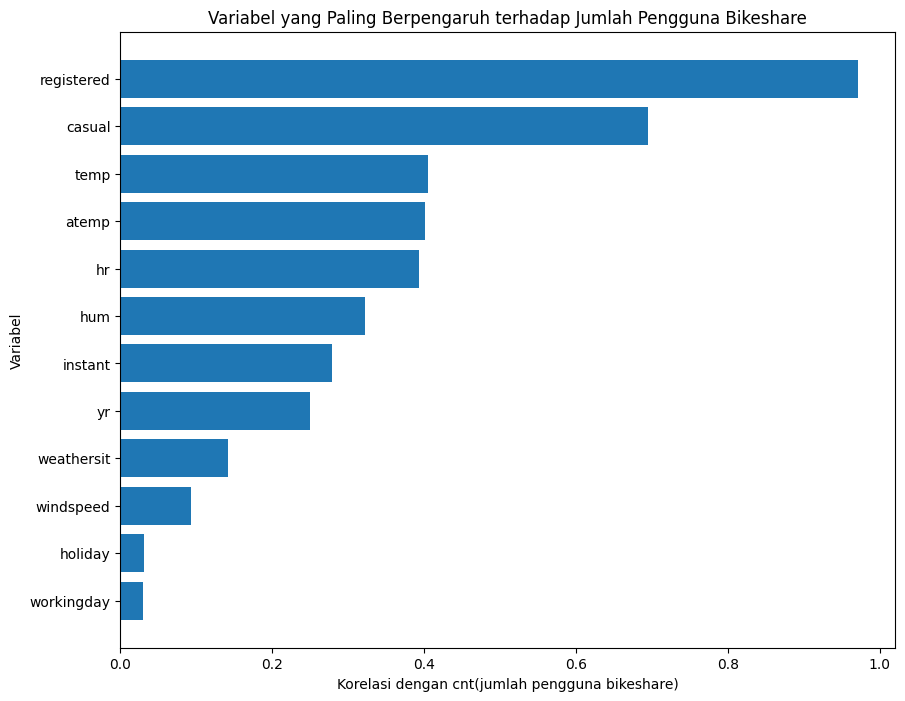

In [17]:


# Menghitung korelasi antara fitur-fitur dan target 'cnt'
correlation = hour_df.corr()['cnt'].drop('cnt')  # Menghapus korelasi dengan dirinya sendiri

# Sorting korelasi secara menurun
correlation_sorted = correlation.abs().sort_values(ascending=True)

# Membuat plot diagram batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(correlation_sorted.index, correlation_sorted.values)
plt.xlabel('Korelasi dengan cnt(jumlah pengguna bikeshare)')
plt.ylabel('Variabel')
plt.title('Variabel yang Paling Berpengaruh terhadap Jumlah Pengguna Bikeshare')
plt.show()

Berdasarkan hasil pemgamatan, bahwasannya hasil kurva tersebut adalah sebagai berikut:
- variabel temp menjadi yang tertinggi setelah nilai casual dan registered. wajar saja apabila casual dan registered tertinggi karena variabel ini menjadi persepsi pemimpinya
- variabel holiday dan workingday menjadi variabel terendah yang berkorelasi dengan Jumlah pengguna

#### 4.3.1.2 Scatter Plot

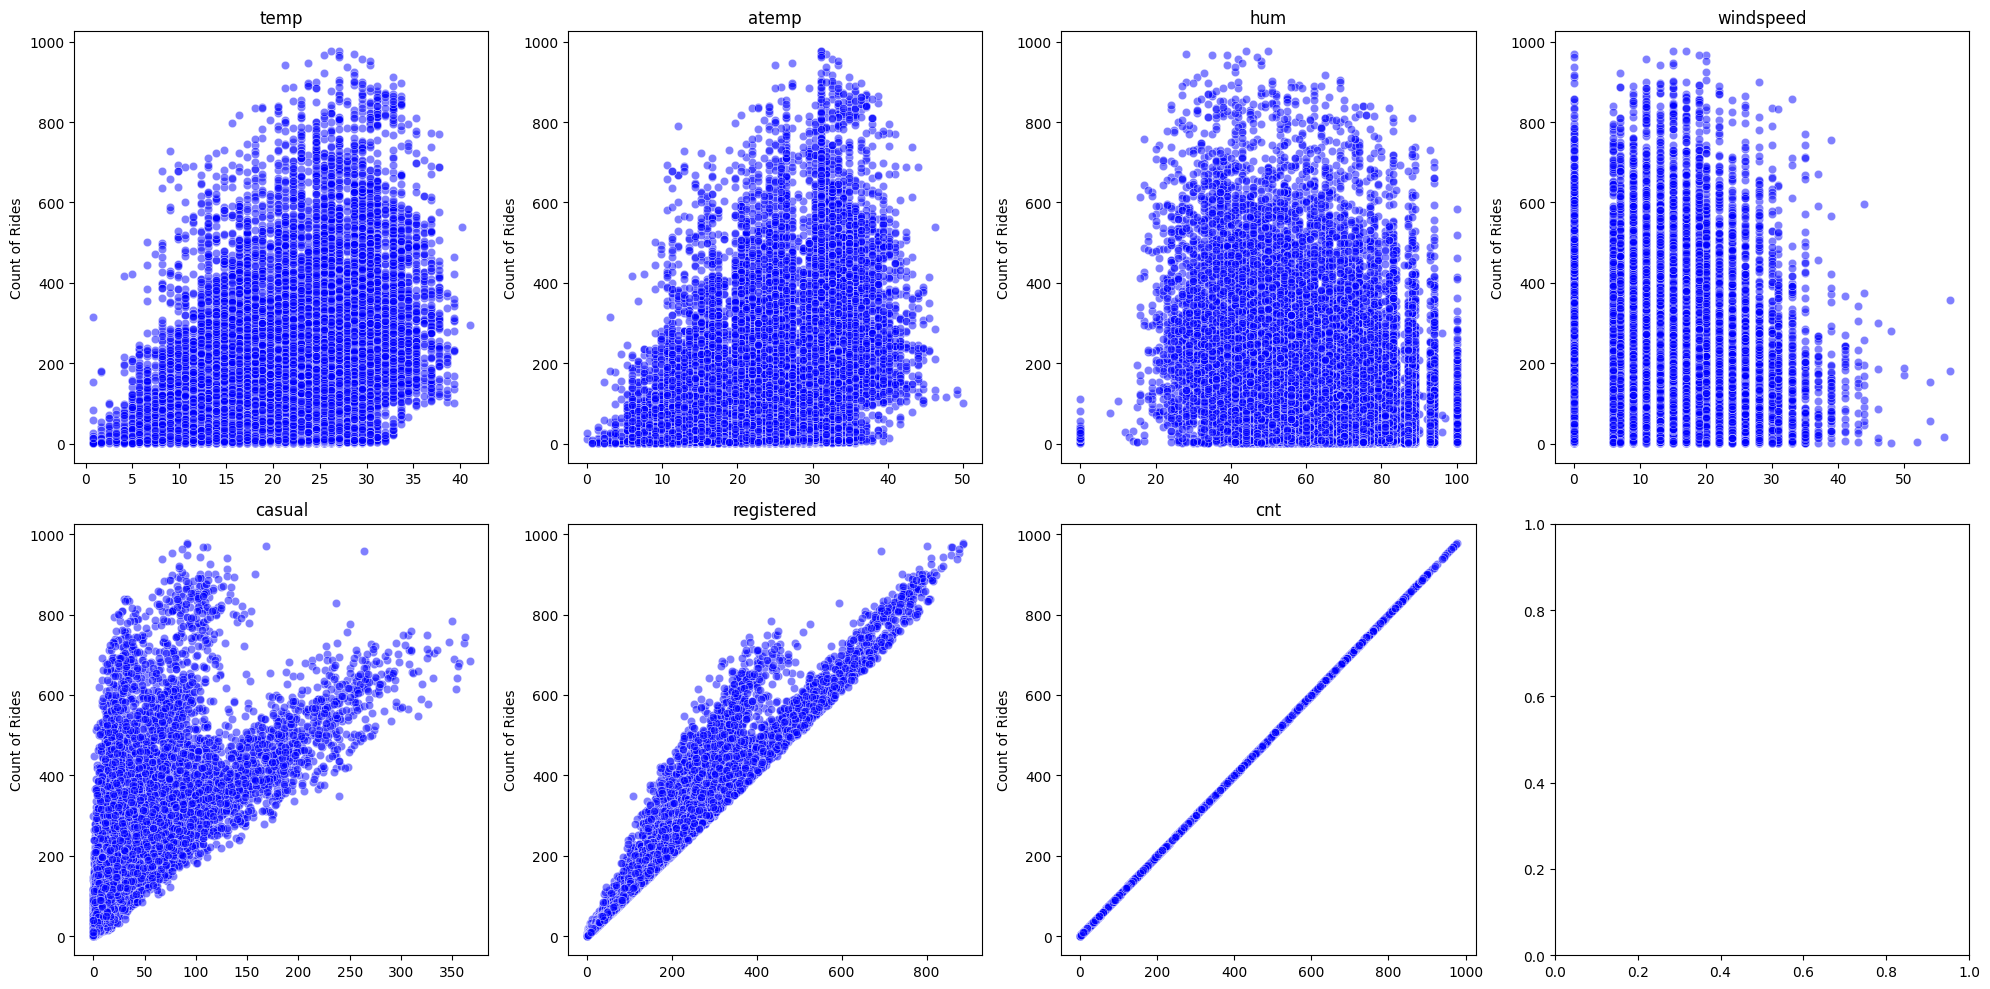

In [18]:
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Buat subplots
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Iterasi variabel numerik dan buat scatter plot untuk masing-masing
for i, var in enumerate(numeric_vars):
    row = i // 4
    col = i % 4
    sns.scatterplot(x=var, y='cnt', data=hour_df, ax=axs[row, col], color='blue', alpha=0.5)

    # Set judul dan label
    axs[row, col].set_title(var)
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("Count of Rides")

# Atur layout subplots
plt.tight_layout()

# Tampilkan plot
plt.show()

Berdasarkan hasil pengamatan, bahwasannya hampir semua variabel berkorelasi spesifik. namun, wind speed memiliki korelasi negatif dengan jumlah pengguna Bikeshare


- plot untuk `temp`, `atemp`, dan `hum` tidak menunjukkan outlier, sedangkan untuk `kecepatan angin` outlier teramati.

- Meskipun ada outlier dalam variabel `kecepatan angin`, kami melihat bahwa nilai maksimumnya adalah 87 mph, dan ini bukan anomali dan mungkin terjadi dalam kehidupan nyata. Jadi kami tidak akan menghapus outlier dalam kasus ini.

- Mirip dengan `kecepatan angin`, outlier Boxplot tidak akan dihapus karena mungkin saja ada hari-hari dengan jumlah perjalanan yang sangat tinggi.

### 4.3.2 Analisis Multivariat

#### 4.3.2.1 Piechart untuk setiap variable

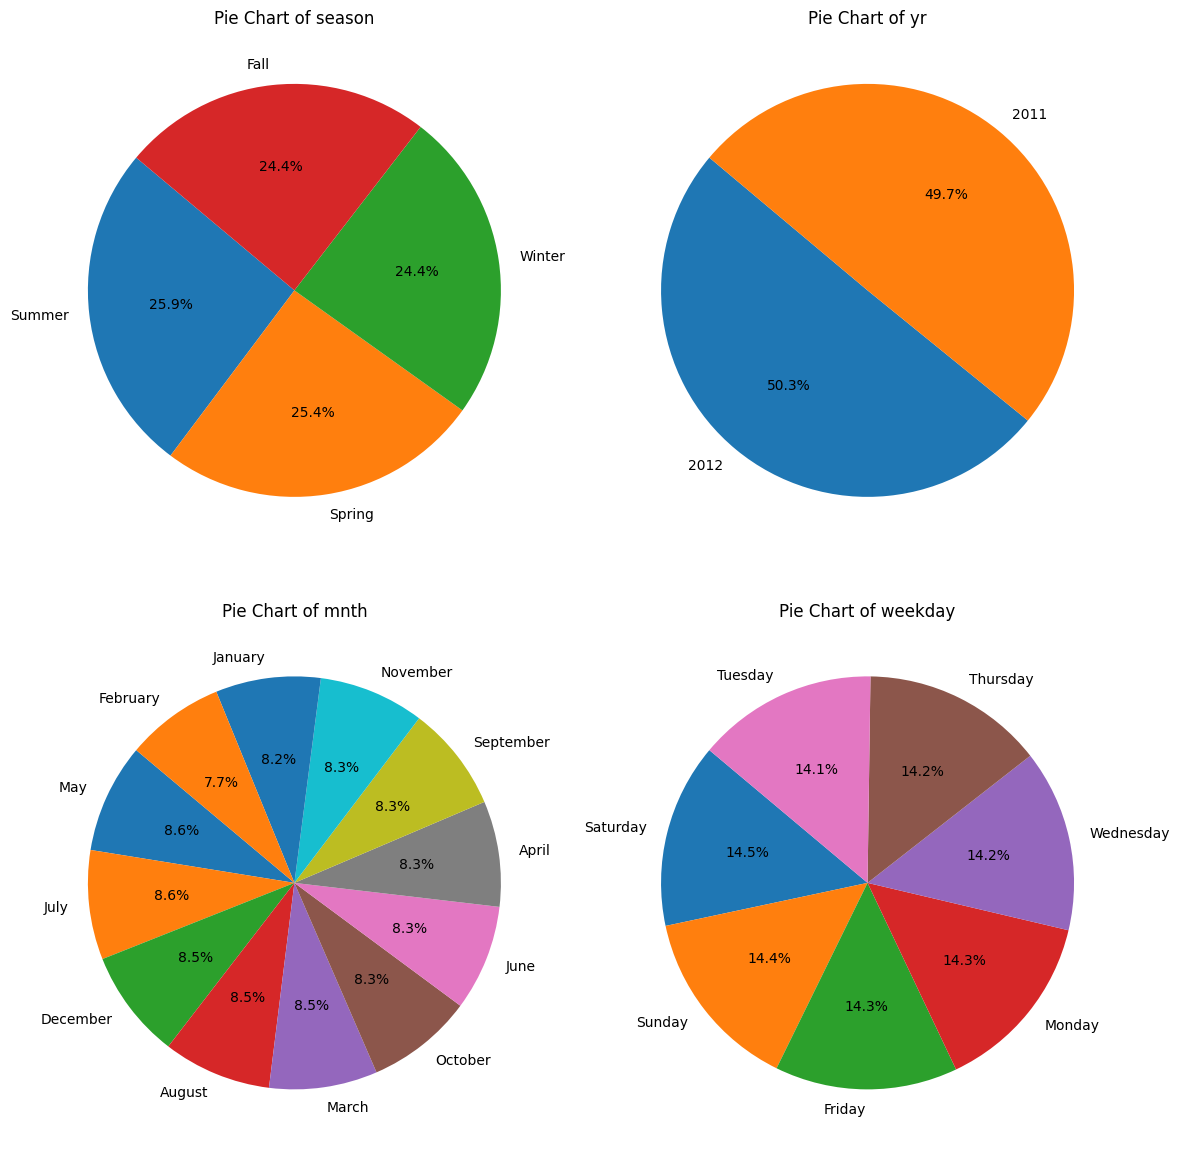

In [19]:
import matplotlib.pyplot as plt

# List variabel kategorikal
categorical_vars = ['season', 'yr', 'mnth', 'weekday']
labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Buat subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Iterasi variabel kategorikal dan buat pie chart untuk masing-masing
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    counts = hour_df[var].value_counts()
    axs[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title('Pie Chart of ' + var)

# Atur layout subplots
plt.tight_layout()

# Tampilkan plot
plt.show()

berdasarkan hasil pengamatan, bahwasannya senantiasa terlihat antara semua variabel terhadap cnt. untuk season bahwasannya summer mendominasi, untuk yr tahun 2012 mendominasi, untuk mnth  mei dan juli mendominasi, sedangaka untuk weekday hari saturday mendominasi

### 4.3.2.2 Rentang Waktu Pengguna Bikeshare





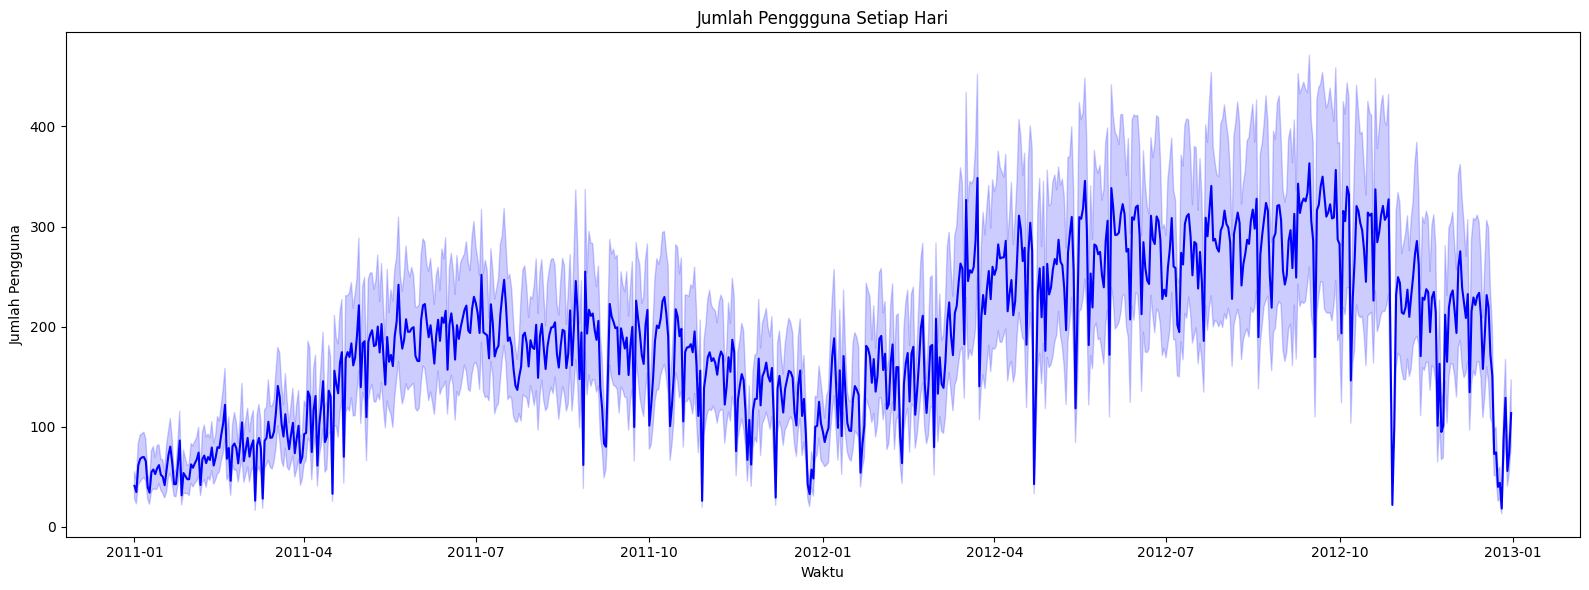

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for bike share rides by day
plt.figure(figsize=(16, 6))

# Create a scatter plot using the sns.scatterplot() function
sns.lineplot(x="dteday", y="cnt", data=hour_df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Waktu")
plt.ylabel("Jumlah Pengguna")
plt.title("Jumlah Penggguna Setiap Hari")

# Show the plot
plt.tight_layout()
plt.show()

- Jumlah perjalanan mulai rendah di setiap awal tahun, lalu mulai meningkat di pertengahan tahun, lalu menurun menjelang akhir tahun.
- Jumlah pengguna tampaknya lebih tinggi pada tahun 2012 dibandingkan tahun 2011.



#### 4.3.2.3 Jumlah Pengguna Bedasarkan tipe

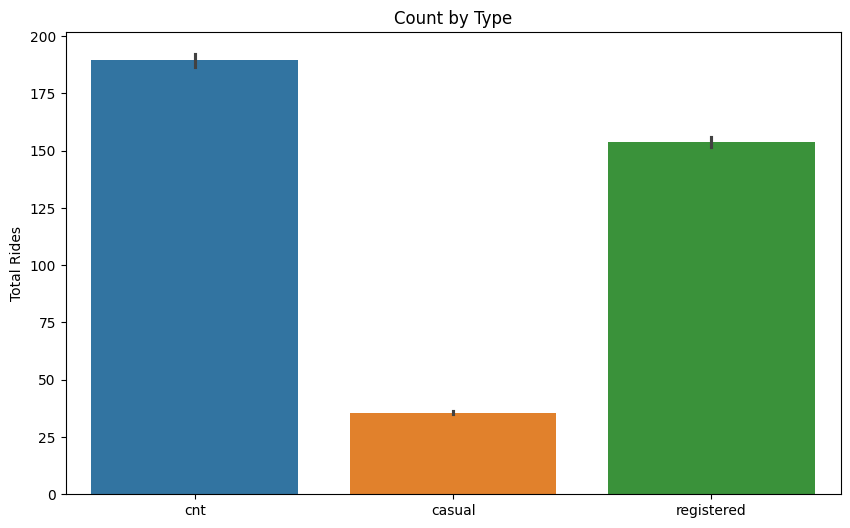

In [21]:
plt.figure(figsize=(10,6))

sns.barplot(data=hour_df[['cnt', 'casual', 'registered']])

# Add labels and a title to the plot
plt.ylabel("Total Rides")
plt.title("Count by Type")

# Show the plot
plt.show()

Jumlah perjalanan bikeshare bervariasi berdasarkan keanggotaan; jumlah perjalanan bikeshare yang terdaftar lebih tinggi dibandingkan perjalanan biasa

#### 4.3.2.4 Pengguna Bikeshare berdasarkan Musim

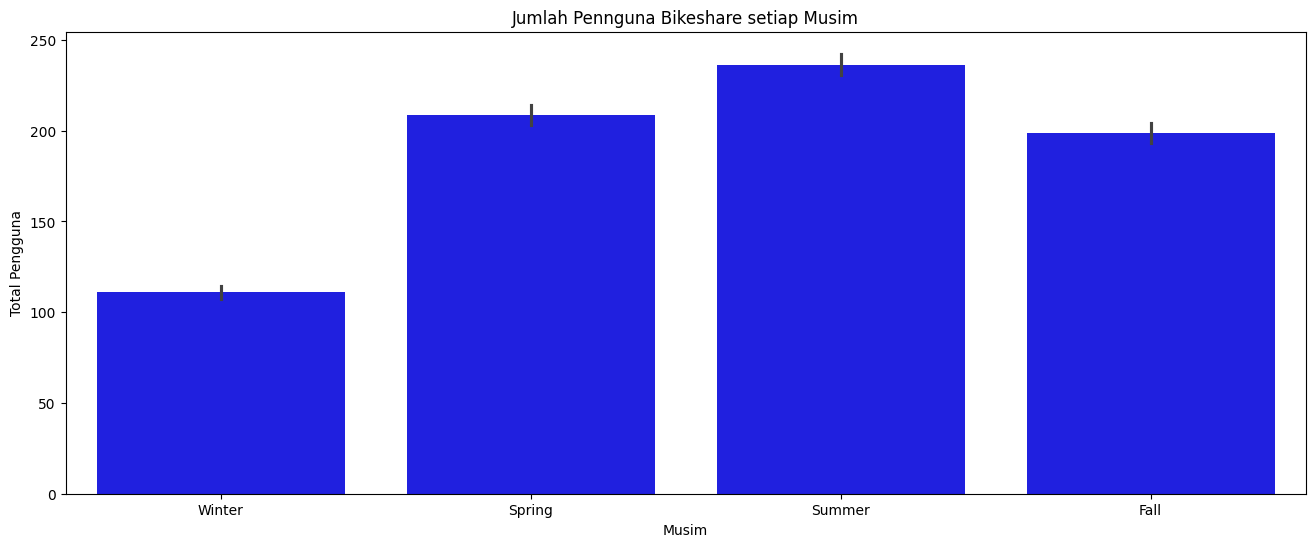

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for bike share rides by season
plt.figure(figsize=(16, 6))

# Create a line plot using the sns.lineplot() function
sns.barplot(
    x="season",
    y="cnt",
    data=hour_df,
    color="blue"
)

# Add labels and a title to the plot
plt.xlabel("Musim")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pennguna Bikeshare setiap Musim")

# Show the plot
plt.show()

Seperti yang terlihat pada diagram garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.




#### 4.3.2.5 Pengguna Bikeshare Setiap Bulan

<ipython-input-23-b91714528564>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-b91714528564>:4: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


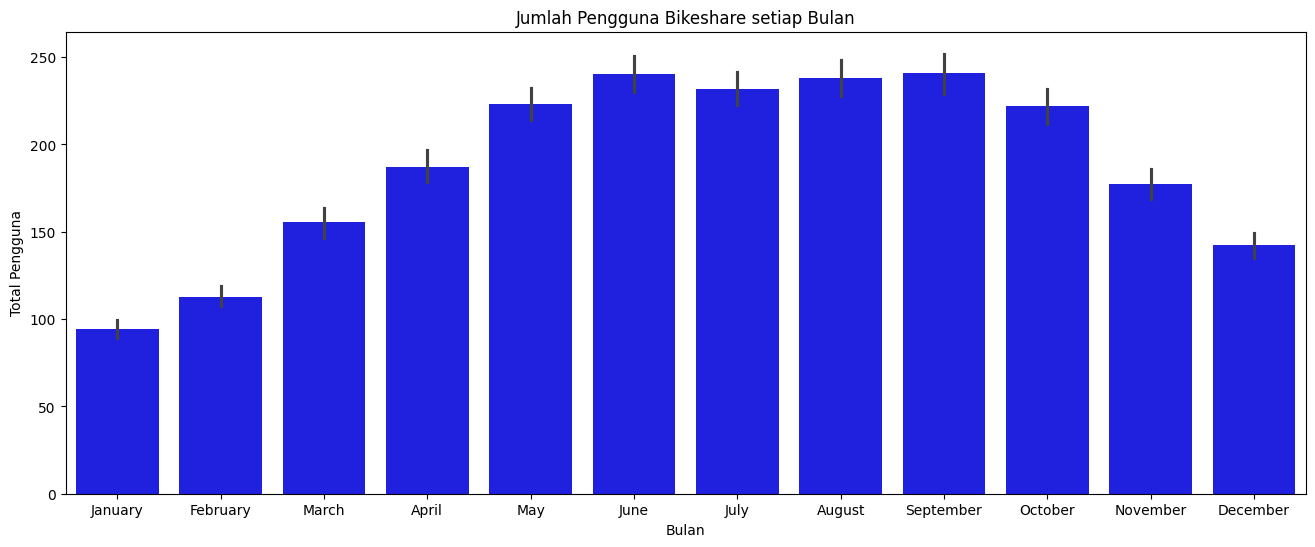

In [23]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="mnth",
    y="cnt",
    data=hour_df,
    palette=["blue"]
)

# Add labels and a title to the plot
plt.xlabel("Bulan")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna Bikeshare setiap Bulan")

# Show the plot
plt.show()

Seperti yang terlihat pada diagram garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah rides bikeshare cenderung meningkat pada pertengahan tahun, dan menurun pada awal tahun (Januari dan Februari) dan pada akhir tahun (November dan Desember)

#### 4.3.2.6 Pengguna Bikeshare setiap Weekday

<ipython-input-24-3d79b7f2a877>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-24-3d79b7f2a877>:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


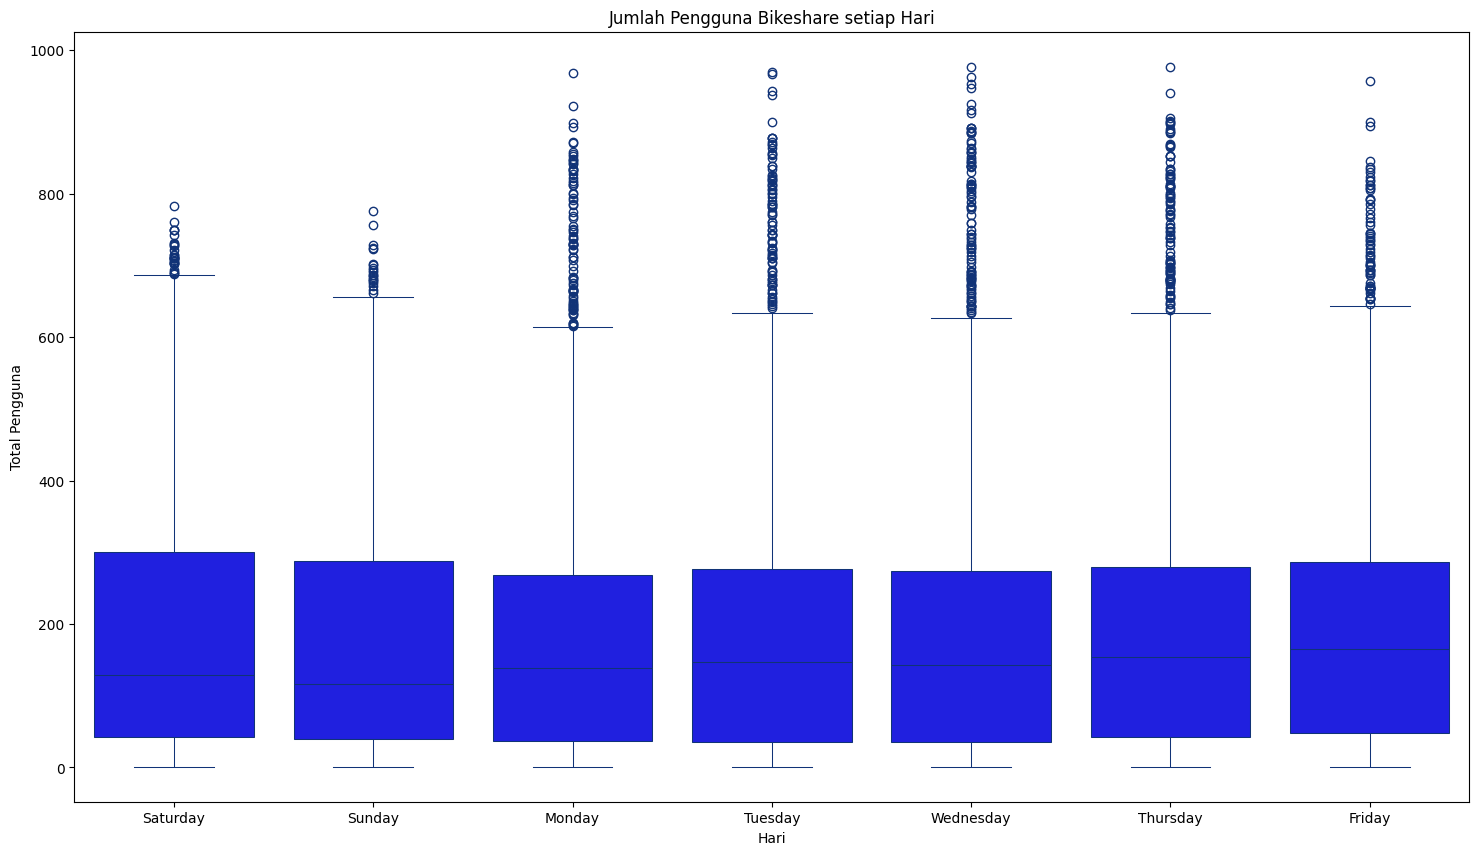

In [24]:
plt.figure(figsize=(18,10))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=hour_df,
    palette=["blue"],
    linecolor="#137",
    linewidth=.75
)

# Add labels and a title to the plot
plt.xlabel("Hari")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna Bikeshare setiap Hari")

# Show the plot
plt.show()

- Plot kotak menunjukkan jumlah perjalanan yang hampir sama setiap hari kerja
- Jumlah outlier pada hari Sabtu dan Minggu lebih sedikit dibandingkan hari lainnya

#### 4.3.2.7 Pengguna Bikeshare setiap Jam

<ipython-input-25-d65aaa81e51b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-d65aaa81e51b>:8: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


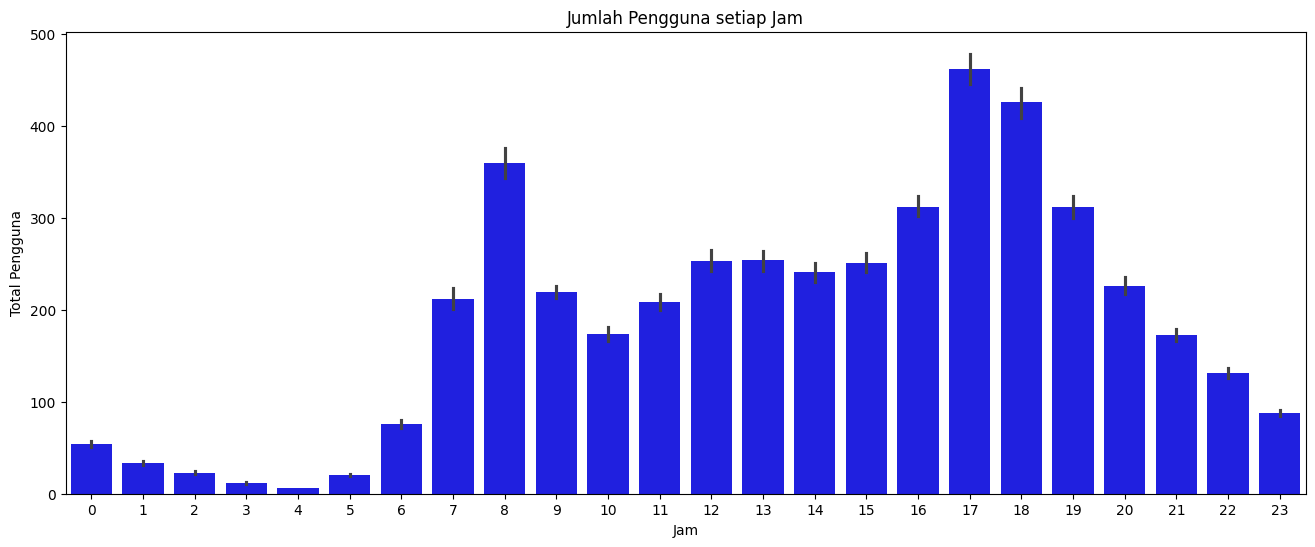

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for bike share rides by hour
plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="hr",
    y="cnt",
    data=hour_df,
    palette=["blue"]
)

# Add labels and a title to the plot
plt.xlabel("Jam")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna setiap Jam")

# Show the plot
plt.show()

- Dari tengah malam hingga subuh, jumlah perjalanan bikeshare paling sedikit
- Mulai meningkat pada pagi hari, dan mencapai puncaknya pada pukul 08.00
- Pada siang hari mulai berkurang lagi, namun mulai pukul 16.00 mulai meningkat lagi dan mencapai puncaknya lagi pada pukul 17.00
- Setelah itu jumlah perjalanan bikeshare berkurang sepanjang malam

#### 4.3.2.8 Pengguna Bikeshare setiap Holiday

<ipython-input-26-5978936a41ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


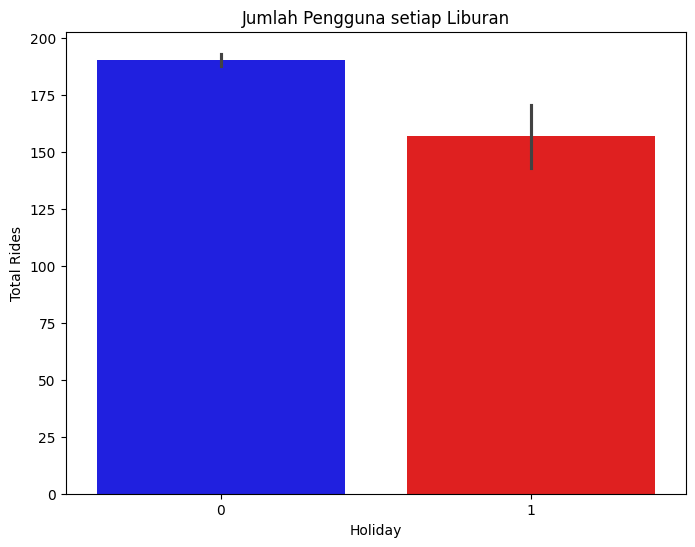

Count of bikeshare users based on holiday:
0    16879
1      500
Name: holiday, dtype: int64


In [26]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="holiday",
    y="cnt",
    data=hour_df,
    palette=["blue", "red"]
)

# Add labels and a title to the plot
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Jumlah Pengguna setiap Liburan")
plt.show()

print('Count of bikeshare users based on holiday:')
print(hour_df['holiday'].value_counts())

Jumlah perjalanan bikeshare di luar hari libur lebih tinggi dibandingkan hari libur, namun hal ini dapat dimaklumi karena jumlah hari libur lebih sedikit dibandingkan hari bukan hari libur.

#### 4.3.2.9 Pengguna Bikeshare setiap Workingday

<ipython-input-27-e6c2566dd3e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


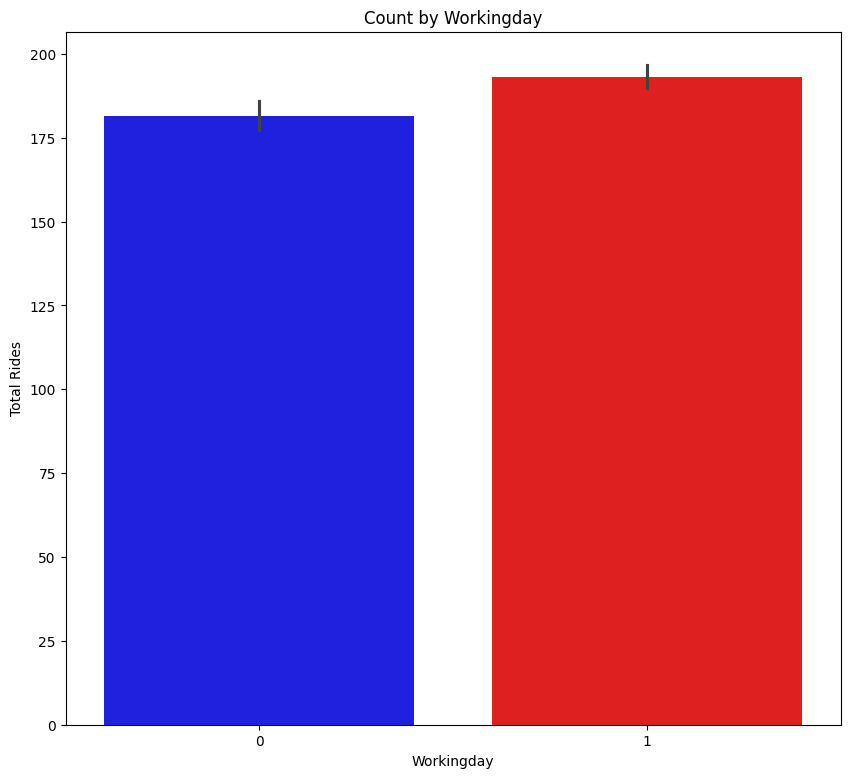

Count of bikeshare users based on working day:
1    11865
0     5514
Name: workingday, dtype: int64


In [27]:
plt.figure(figsize=(10,9))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="workingday",
    y="cnt",
    data=hour_df,
    palette=["blue","red"]
)

# Add labels and a title to the plot
plt.xlabel("Workingday")
plt.ylabel("Total Rides")
plt.title("Count by Workingday")

# Show the plot
plt.show()

print('Count of bikeshare users based on working day:')
print(hour_df['workingday'].value_counts())

Jumlah perjalanan bikeshare pada hari kerja lebih tinggi dibandingkan pada hari libur, namun hal ini dapat dimaklumi karena jumlah hari libur dan akhir pekan lebih sedikit dibandingkan hari kerja.

#### 4.3.2.10 Heatmaps Korelasi

In [28]:
hour_df.corr()


<ipython-input-28-3394dad3ede6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hour_df.corr()


,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<ipython-input-29-37deb4ec7d28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(), annot=True, cmap='Blues')


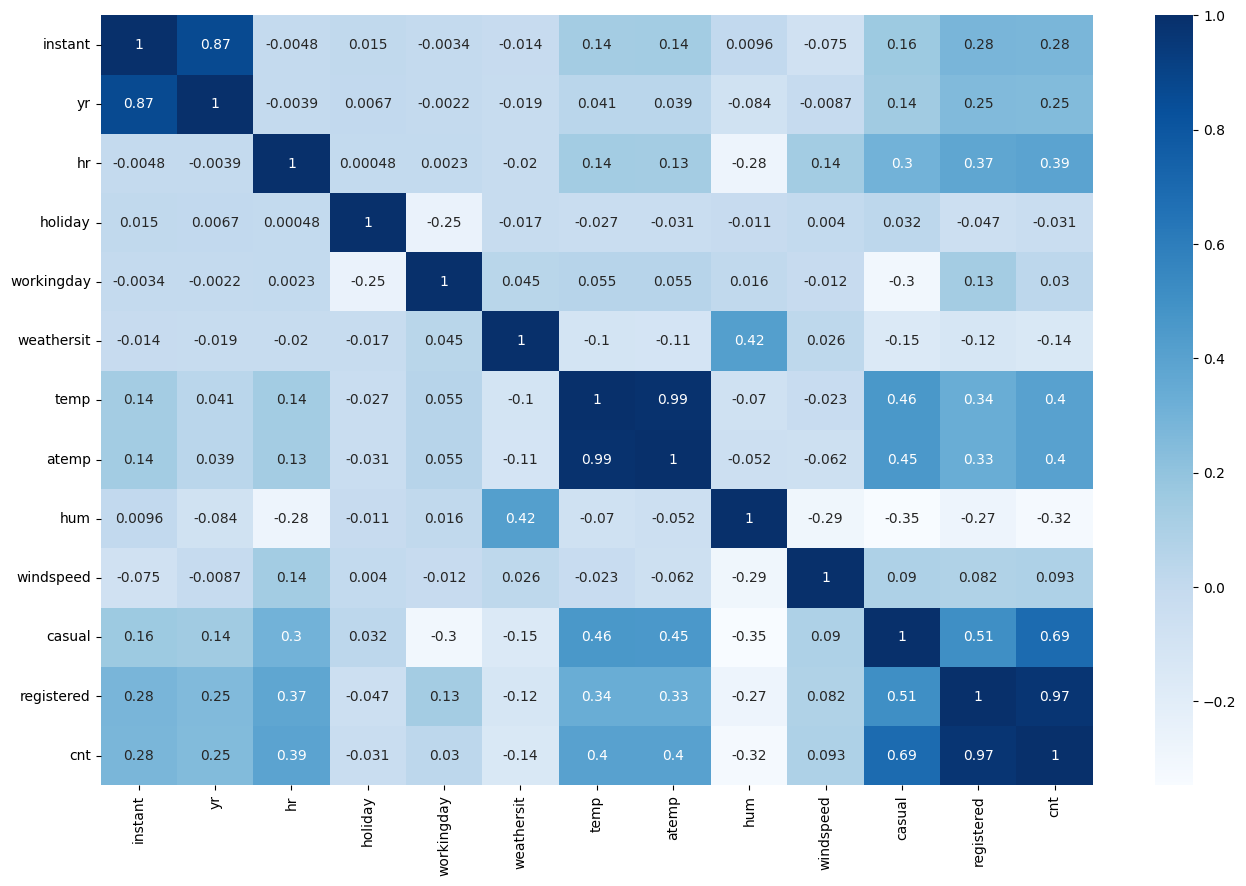

In [29]:

plt.figure(figsize=(16, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap='Blues')
plt.show()

- Terdapat korelasi yang kuat antara variabel kasual dan terdaftar vs. cnt, meskipun hal ini diperkirakan terjadi karena peningkatan pengguna kasual dan terdaftar akan mempengaruhi cnt (total perjalanan) secara langsung.
- Ada korelasi moderat antara jam, suhu, dan suhu vs jumlah perjalanan bikeshare.

## 4.4 Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana pengaruh pola-pola jumlah pengguna Bikeshare terhadap musim dan cuaca dapat dipengaruhi oleh faktor pendukung seperti suhu, kelembaban, dan kecepatan angin?


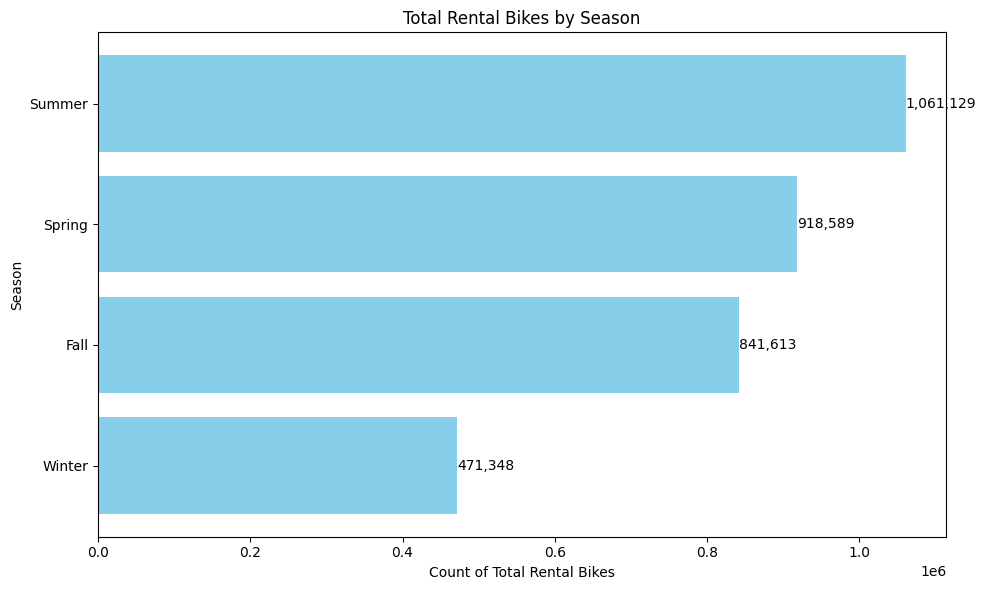

In [30]:
season_counts = hour_df.groupby('season')['cnt'].sum().reset_index()

# Sort the data by cnt in descending order
season_counts = season_counts.sort_values(by='cnt', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(season_counts['season'], season_counts['cnt'], color='skyblue')
plt.xlabel('Count of Total Rental Bikes')
plt.ylabel('Season')
plt.title('Total Rental Bikes by Season')
plt.gca().invert_yaxis()

# Add counts as annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width()):,}',
             va='center', ha='left')

plt.tight_layout()
plt.show()

berdasarkan hasil pengamatan bahwasannya musim panas (summer) mendominasi terhadao jumlah pengguna bike share terbanyak. sedangkan, musim hujan (winter) menjadi yang terendah karena wajar saja musim hujan dirasa kurang pas untuk menggunakan sepeda

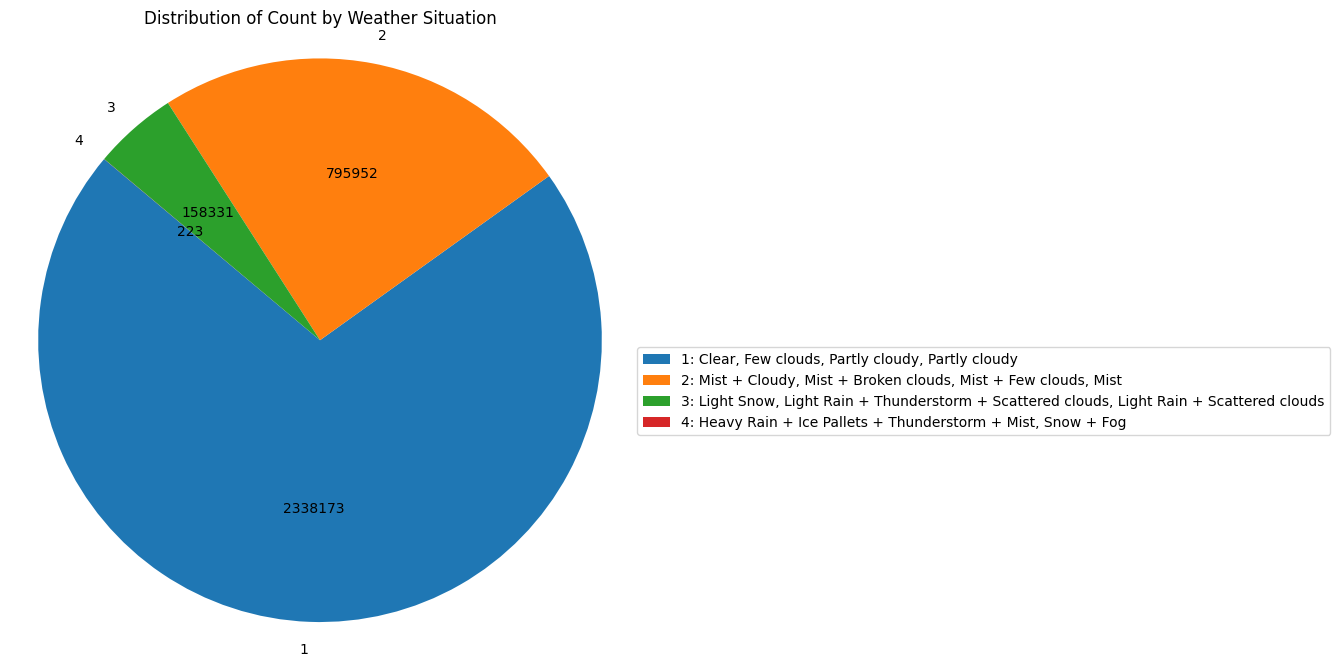

In [31]:
total_cnt_by_weather = hour_df.groupby('weathersit')['cnt'].sum()

# Keterangan untuk weathersit
weather_legend = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Plotting pie chart dengan legenda
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(total_cnt_by_weather, labels=total_cnt_by_weather.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Count by Weather Situation')

# Menambahkan nilai cnt di sekitar pie chart
for i, cnt in enumerate(total_cnt_by_weather):
    autotexts[i].set_text(f'{cnt}')

# Menambahkan legenda dengan jarak
plt.legend(labels=[f'{key}: {value}' for key, value in weather_legend.items()], loc='upper left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Berdasarkan hasil pengamatan ini juga bahwasannya cuaca yang cerah menarik banyak minat untuk para pengguna sepeda, dan sedangkan cuaca yang buruk seperti hujan lebat tidak memungkinkan untuk menggunakan sepeda.

<ipython-input-32-b6995fc72c86>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_season_values = hour_df.groupby('season').mean()


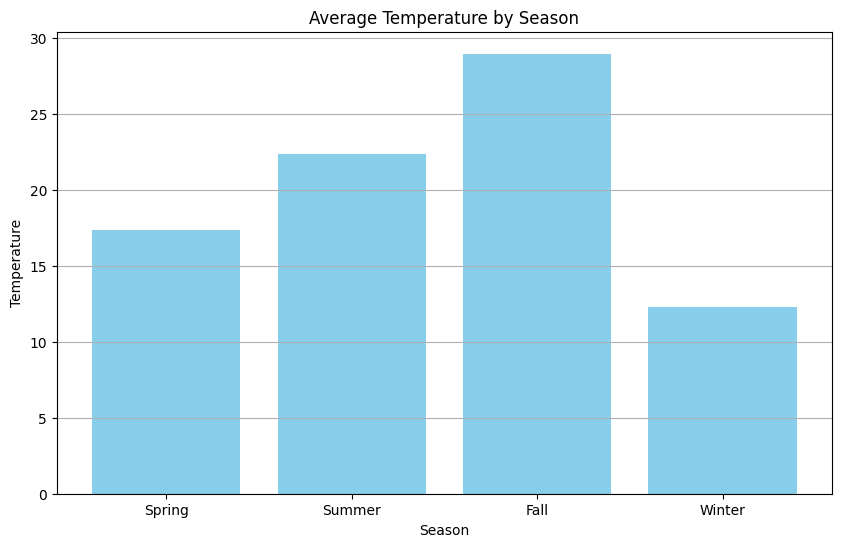

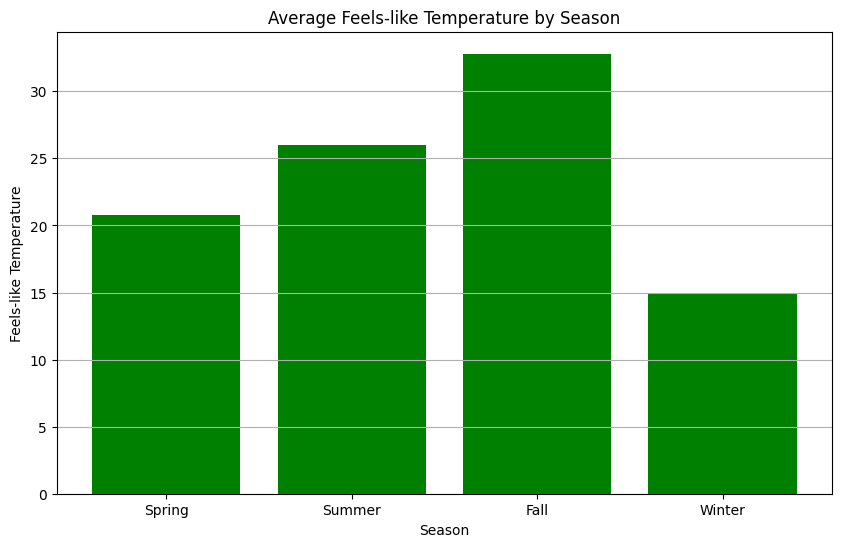

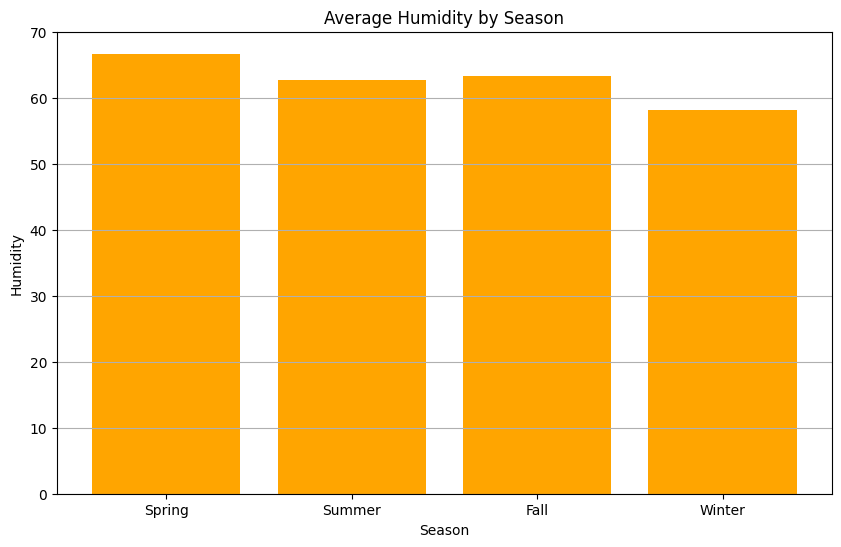

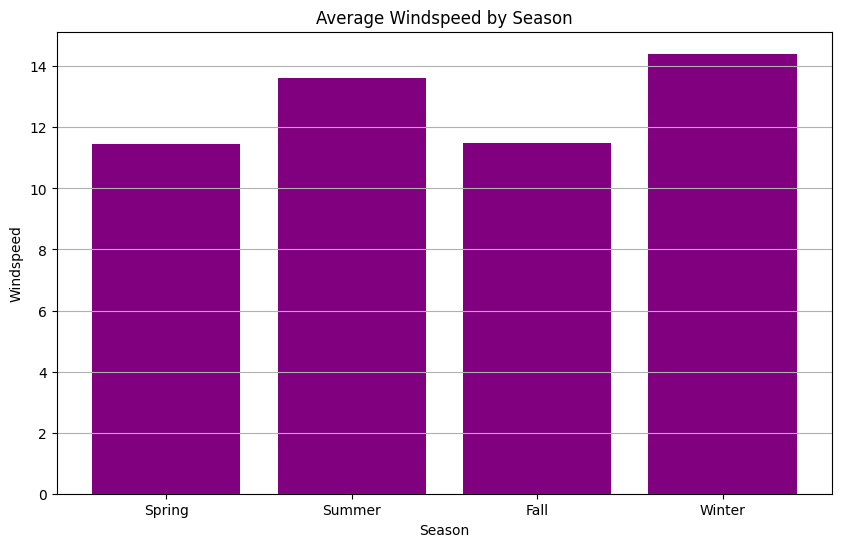

In [32]:
# Menghitung rata-rata nilai untuk setiap season
avg_season_values = hour_df.groupby('season').mean()

# Plotting bar plot untuk hubungan antara Season dan Temperature
plt.figure(figsize=(10, 6))
plt.bar(avg_season_values.index, avg_season_values['temp'], color='skyblue')
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y')
plt.show()

# Plotting bar plot untuk hubungan antara Season dan Feels-like Temperature
plt.figure(figsize=(10, 6))
plt.bar(avg_season_values.index, avg_season_values['atemp'], color='green')
plt.title('Average Feels-like Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Feels-like Temperature')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y')
plt.show()

# Plotting bar plot untuk hubungan antara Season dan Humidity
plt.figure(figsize=(10, 6))
plt.bar(avg_season_values.index, avg_season_values['hum'], color='orange')
plt.title('Average Humidity by Season')
plt.xlabel('Season')
plt.ylabel('Humidity')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y')
plt.show()

# Plotting bar plot untuk hubungan antara Season dan Windspeed
plt.figure(figsize=(10, 6))
plt.bar(avg_season_values.index, avg_season_values['windspeed'], color='purple')
plt.title('Average Windspeed by Season')
plt.xlabel('Season')
plt.ylabel('Windspeed')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y')
plt.show()

Berdasarkan hasil pengamatan, bahwasannya didapatkan sebagai berikut:


*   Musim gugur mencapai suhu dari rentang 25-30 derajat celsius dan suhu yang dirasakan mencapai rentang 30-35, kelembaban mencapai rentang 60-70, dan kecepatan angin mencapai rentang 10-12
*  Musim Panas mencapai suhu dari rentang 20-25 derajat celsius dan suhu yang dirasakan mencapai rentang 25-30 derajat celsius, kelembaban mencapai rentang 60-70, dan kecepatan angin mencapai rentang 12-14
*   Musim Semi mencapai suhu dari rentang 15-20 derajat celsius dan suhu yang dirasakan mencapai rentang 20-25, kelembaban mencapai rentang 60-70 yang paling tinggi, dan kecepatan angin mencapai rentang 10-12
*  Musim Hujan mencapai suhu dari rentang 10-15 derajat celsius dan suhu yang dirasakan mencapai rentang 20 derajat celsius, kelembaban mencapai rentang 50-60, dan kecepatan angin mencapai lebih dari 14



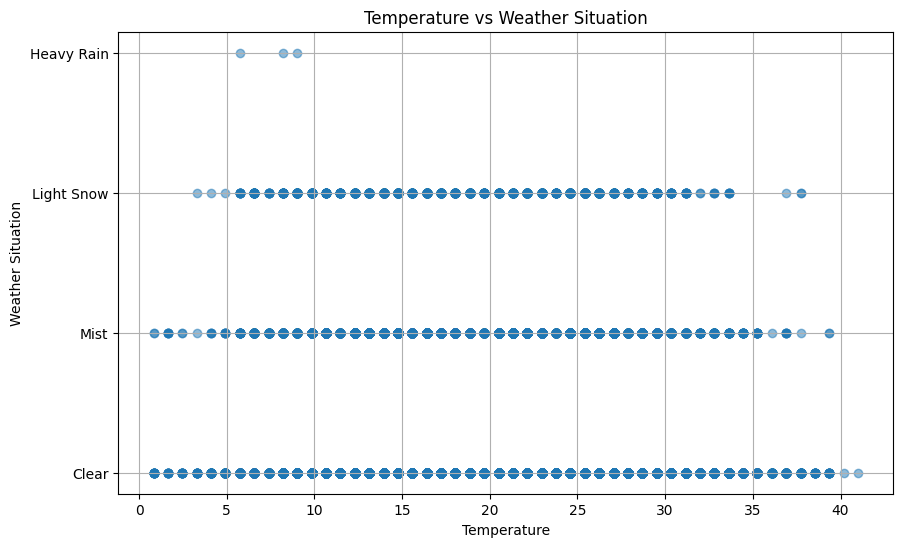

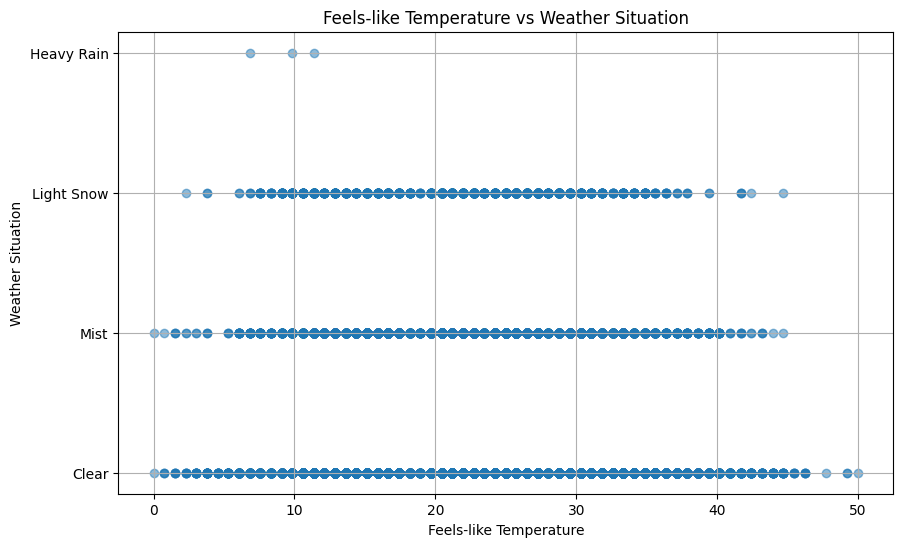

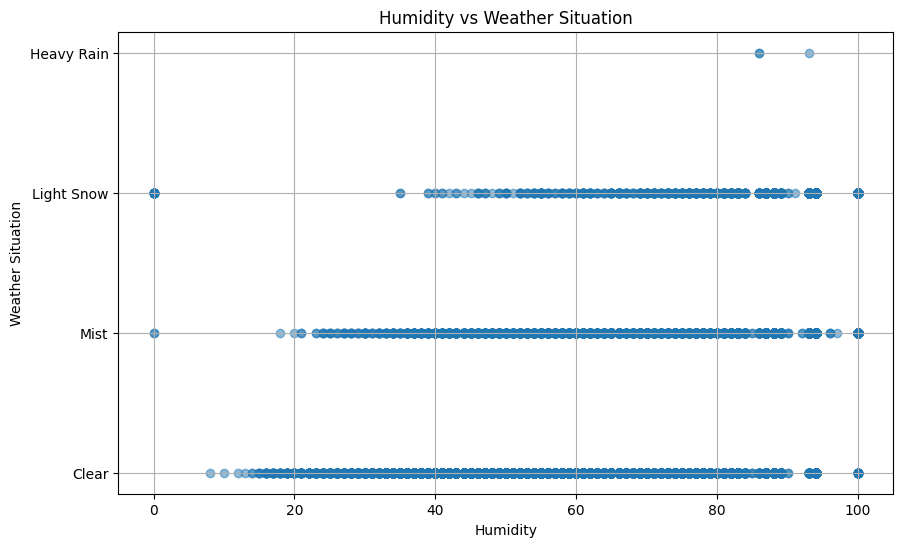

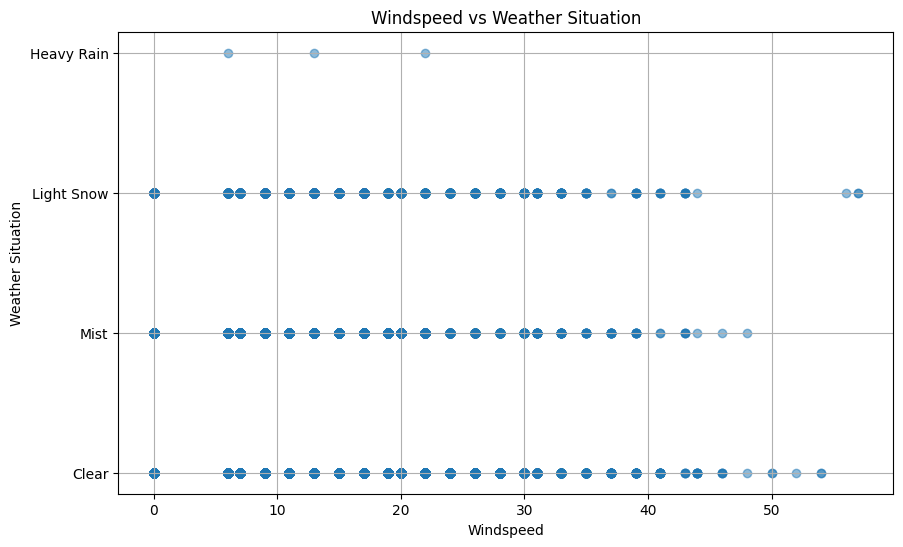

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['temp'], hour_df['weathersit'], alpha=0.5)
plt.title('Temperature vs Weather Situation')
plt.xlabel('Temperature')
plt.ylabel('Weather Situation')
plt.yticks([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(True)
plt.show()

# Plotting hubungan antara Weather Situation dan Feels-like Temperature
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['atemp'], hour_df['weathersit'], alpha=0.5)
plt.title('Feels-like Temperature vs Weather Situation')
plt.xlabel('Feels-like Temperature')
plt.ylabel('Weather Situation')
plt.yticks([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(True)
plt.show()

# Plotting hubungan antara Weather Situation dan Humidity
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['hum'], hour_df['weathersit'], alpha=0.5)
plt.title('Humidity vs Weather Situation')
plt.xlabel('Humidity')
plt.ylabel('Weather Situation')
plt.yticks([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(True)
plt.show()

# Plotting hubungan antara Weather Situation dan Windspeed
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['windspeed'], hour_df['weathersit'], alpha=0.5)
plt.title('Windspeed vs Weather Situation')
plt.xlabel('Windspeed')
plt.ylabel('Weather Situation')
plt.yticks([1, 2, 3, 4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(True)
plt.show()

Berdasarkan hasil pengamatan, bahwasannya didapatkan sebagai berikut:


*   cuaca cerah mencapai suhu 40 derajat celsius dan suhu yang dirasakan mencapai rentang 50, kelembaban mencapai rentang 15-85, dan kecepatan angin mencapai rentang 0-50
*  cuara berkabut mencapai suhu dari rentang 35-40 derajat celsius dan suhu yang dirasakan mencapai rentang 45 derajat celsius, kelembaban mencapai rentang 20-100, dan kecepatan angin mencapai rentang 0-45
*   Cuaca Hujan ringan mencapai suhu dari rentang 30-35 derajat celsius dan suhu yang dirasakan mencapai rentang 40 , kelembaban mencapai rentang 40-100 yang paling tinggi, dan kecepatan angin mencapai rentang 10-12
*  cuaca Hujan berat mencapai suhu dari rentang 5-10 derajat celsius dan suhu yang dirasakan mencapai rentang 10 derajat celsius, kelembaban mencapai rentang 80-100, dan kecepatan angin mencapai lebih dari 14



### Pertanyaan 2:  Apakah korelasi antara bulan dan musim dapat berimplikasi terhadap jumlah pengguna Bikeshare?


<ipython-input-34-b91714528564>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-34-b91714528564>:4: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


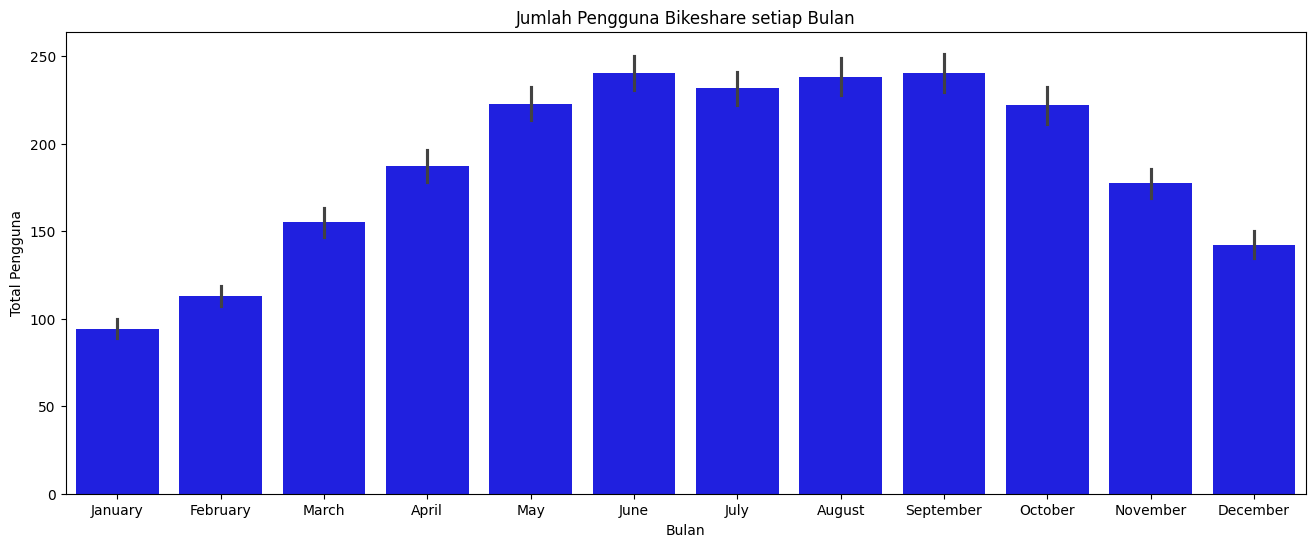

In [34]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="mnth",
    y="cnt",
    data=hour_df,
    palette=["blue"]
)

# Add labels and a title to the plot
plt.xlabel("Bulan")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna Bikeshare setiap Bulan")

# Show the plot
plt.show()

Berdasarkan hasil pengamatan, bahwasannya bulan mei sampai dengan september menjadi yang paling dominan terhadap jumlah pengguna bikeshare ini

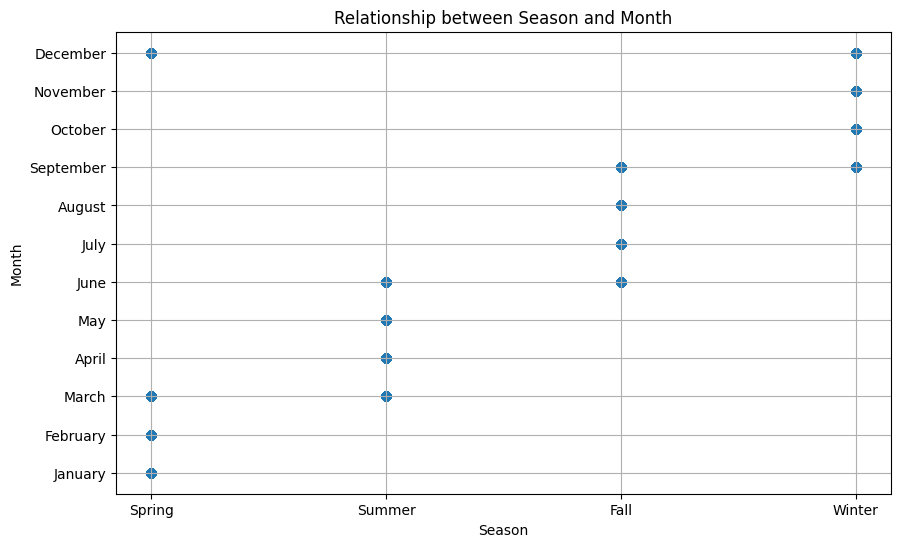

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['season'], hour_df['mnth'], alpha=0.5)
plt.title('Relationship between Season and Month')
plt.xlabel('Season')
plt.ylabel('Month')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])  # Menentukan label sumbu x sebagai musim
plt.grid(True)
plt.show()

berdasarkan hasil pengamatan ini, bahwasannya dapat dilihat sebagai berikut:

*   Musim Semi terjadi di bulan januari, februari, maret dan desember

*   Musim panas terjadi di bulan Maret, april, mei, dan juni


*   Musim Gugur terjadi di bulan juni, juli, agustus, dan september

*   Musim Hujan terjadi di bulan september, oktober, November , desember





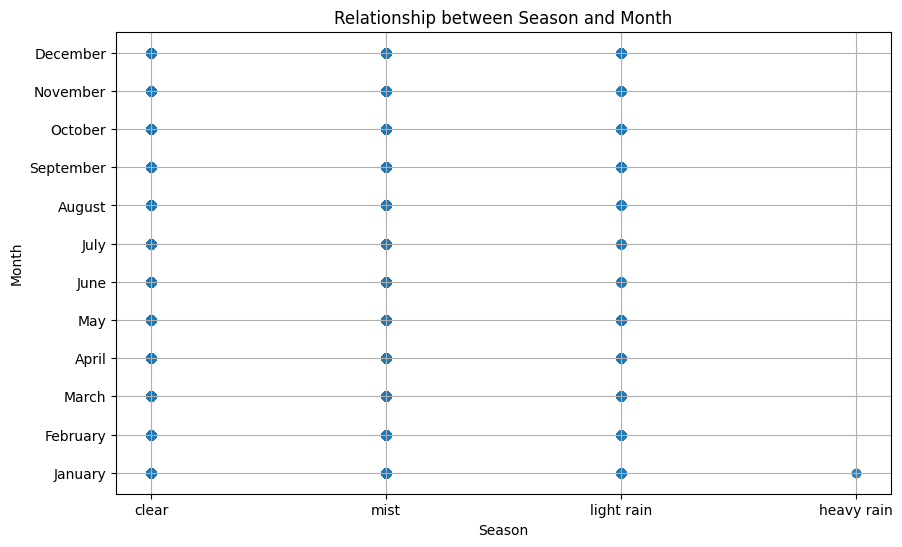

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['weathersit'], hour_df['mnth'], alpha=0.5)
plt.title('Relationship between Season and Month')
plt.xlabel('weathersit')
plt.ylabel('Month')
plt.xticks([1, 2, 3, 4], ['clear', 'mist', 'light rain', 'heavy rain'])  # Menentukan label sumbu x sebagai musim
plt.grid(True)
plt.show()

berdasarkan hasil pengamatan ini, bahwasannya dapat dilihat sebagai berikut:

*  cuaca cerah terjadi di setiap bulan

*  cuaca berkabut terjadi di setiap bulan


*   cuaca hujan ringan terjadi di setiap bulan

*   cuaca hujan berat hanya terjadi di bulan januari





# **5. Conclusion**

Berdasarkan hasil pengamatan kondisi cuaca dan musim, serta pola peminjaman sepeda di setiap musim, kita dapat membuat beberapa hubungan yang mungkin:



*   Musim dan Jumlah Peminjaman: Terdapat korelasi antara musim dengan jumlah peminjaman sepeda. Misalnya, pada musim panas yang memiliki suhu yang nyaman, jumlah peminjaman sepeda mungkin meningkat karena kondisi cuaca yang mendukung aktivitas di luar ruangan. Sebaliknya, pada musim hujan yang memiliki suhu yang lebih rendah dan kemungkinan hujan lebih tinggi, jumlah peminjaman sepeda mungkin menurun.
*  Kondisi Cuaca dan Jumlah Peminjaman: Cuaca juga dapat mempengaruhi jumlah peminjaman sepeda. Cuaca yang cerah dan nyaman cenderung meningkatkan minat orang untuk bersepeda, sementara cuaca buruk seperti hujan berat atau kabut tebal mungkin mengurangi minat untuk bersepeda. Oleh karena itu, kondisi cuaca yang baik biasanya akan menyebabkan peningkatan jumlah peminjaman sepeda.

*   Rentang Suhu dan Kondisi Cuaca dengan Jumlah Peminjaman: Rentang suhu dan kondisi cuaca tertentu dalam setiap musim dapat memiliki dampak yang berbeda pada jumlah peminjaman sepeda. Misalnya, pada musim gugur dengan suhu yang nyaman antara 25-30 derajat Celsius, jumlah peminjaman sepeda mungkin meningkat karena kondisi cuaca yang menyenangkan untuk bersepeda.
*   Rentang Suhu dan Kondisi Cuaca dengan Jumlah Peminjaman: Rentang suhu dan kondisi cuaca tertentu dalam setiap musim dapat memiliki dampak yang berbeda pada jumlah peminjaman sepeda. Misalnya, pada musim gugur dengan suhu yang nyaman antara 25-30 derajat Celsius, jumlah peminjaman sepeda mungkin meningkat karena kondisi cuaca yang menyenangkan untuk bersepeda.


*   Distribusi Cuaca dalam Setiap Bulan dengan Jumlah Peminjaman: Distribusi cuaca dalam setiap bulan juga dapat mempengaruhi jumlah peminjaman sepeda. Cuaca yang cerah dan stabil sepanjang tahun mungkin meningkatkan konsistensi peminjaman sepeda, sementara cuaca ekstrim seperti hujan berat yang hanya terjadi pada bulan tertentu mungkin mengakibatkan penurunan tajam dalam jumlah peminjaman pada bulan tersebut.
*   Dengan memahami pola musim, kondisi cuaca, dan preferensi pengguna terhadap kondisi cuaca, operator penyewaan sepeda dapat mengoptimalkan layanan mereka dengan menyesuaikan strategi pemasaran, penjadwalan inventaris, dan pengelolaan operasional.












